<a href="https://colab.research.google.com/github/evmckinney9/foobar/blob/main/mirage_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!sudo apt install lrslib
!pip install -e git+https://github.com/Pitt-JonesLab/mirror-gates#egg=mirror-gates[core]
!pip install pylatexenc

In [6]:
from qiskit.transpiler import CouplingMap

coupling_map = CouplingMap.from_line(4)

Loading qft_n4 from MQTBench


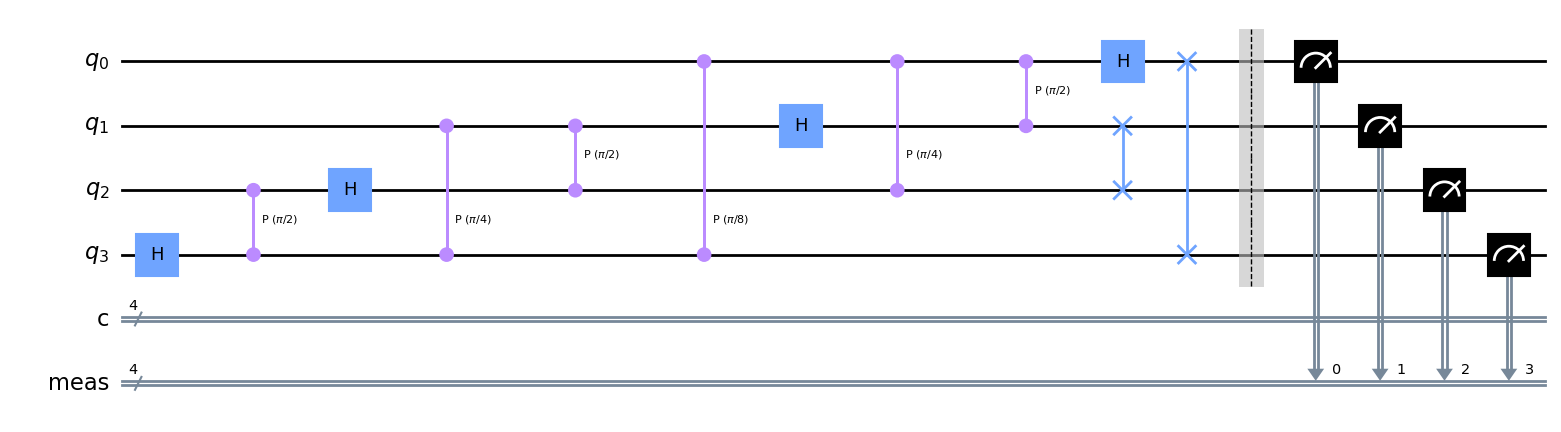

In [7]:
from transpile_benchy.library import CircuitLibrary

lib = CircuitLibrary(circuit_list=[])
qc = lib.get_circuit("qft_n4")
qc = qc.decompose()
display(qc.draw("mpl"))

In [12]:
from mirror_gates.pass_managers import Mirage

mirage = Mirage(
    coupling_map,  # coupling map
    name="Mirage-$\sqrt{\texttt{iSWAP}}$",  # transpile_benchy and figure labels)
    parallel=True,  # run trials in parallel or serial
    cx_basis=False,  # turning on sets CNOT as the basis gate,
    # (can take arbitrary basis but parameters are not configured that way yet)
    cost_function="depth",  # switch to "basic" for counting SWAPs
    fixed_aggression=None,  # force aggression level on all iterations
    layout_trials=None,  # how many independent layout trials to run (20)
    fb_iters=None,  # how many forward-backward iterations to run (4)
    swap_trials=None,  # how many independent routing trials to run (20)
    no_vf2=False,  # keep False to use VF2 for finding complete layouts
    logger=None,  # from logging moduel
)
mirage_qc = mirage.run(circuit=qc)

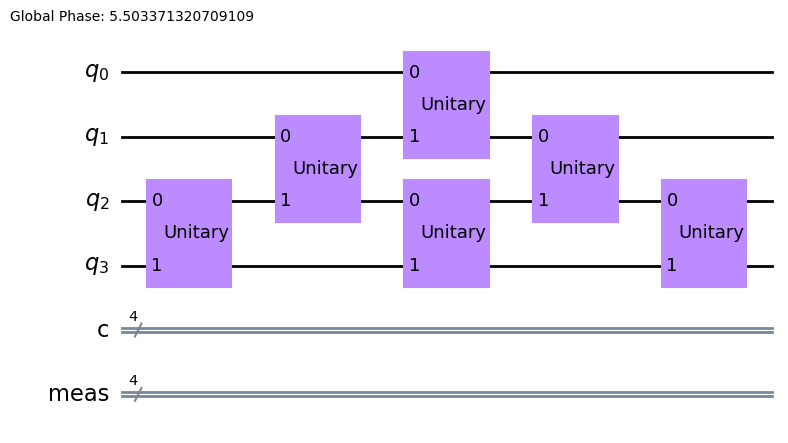

In [13]:
mirage_qc.draw("mpl")

In [8]:
from qiskit import transpile
from mirror_gates import sqiswap_equiv

mirage_qc = transpile(
    qc,
    optimization_level=3,
    coupling_map=coupling_map,
    basis_gates=["u", "xx_plus_yy", "id"],
    routing_method="mirage",
    layout_method="sabre_layout_v2",
)

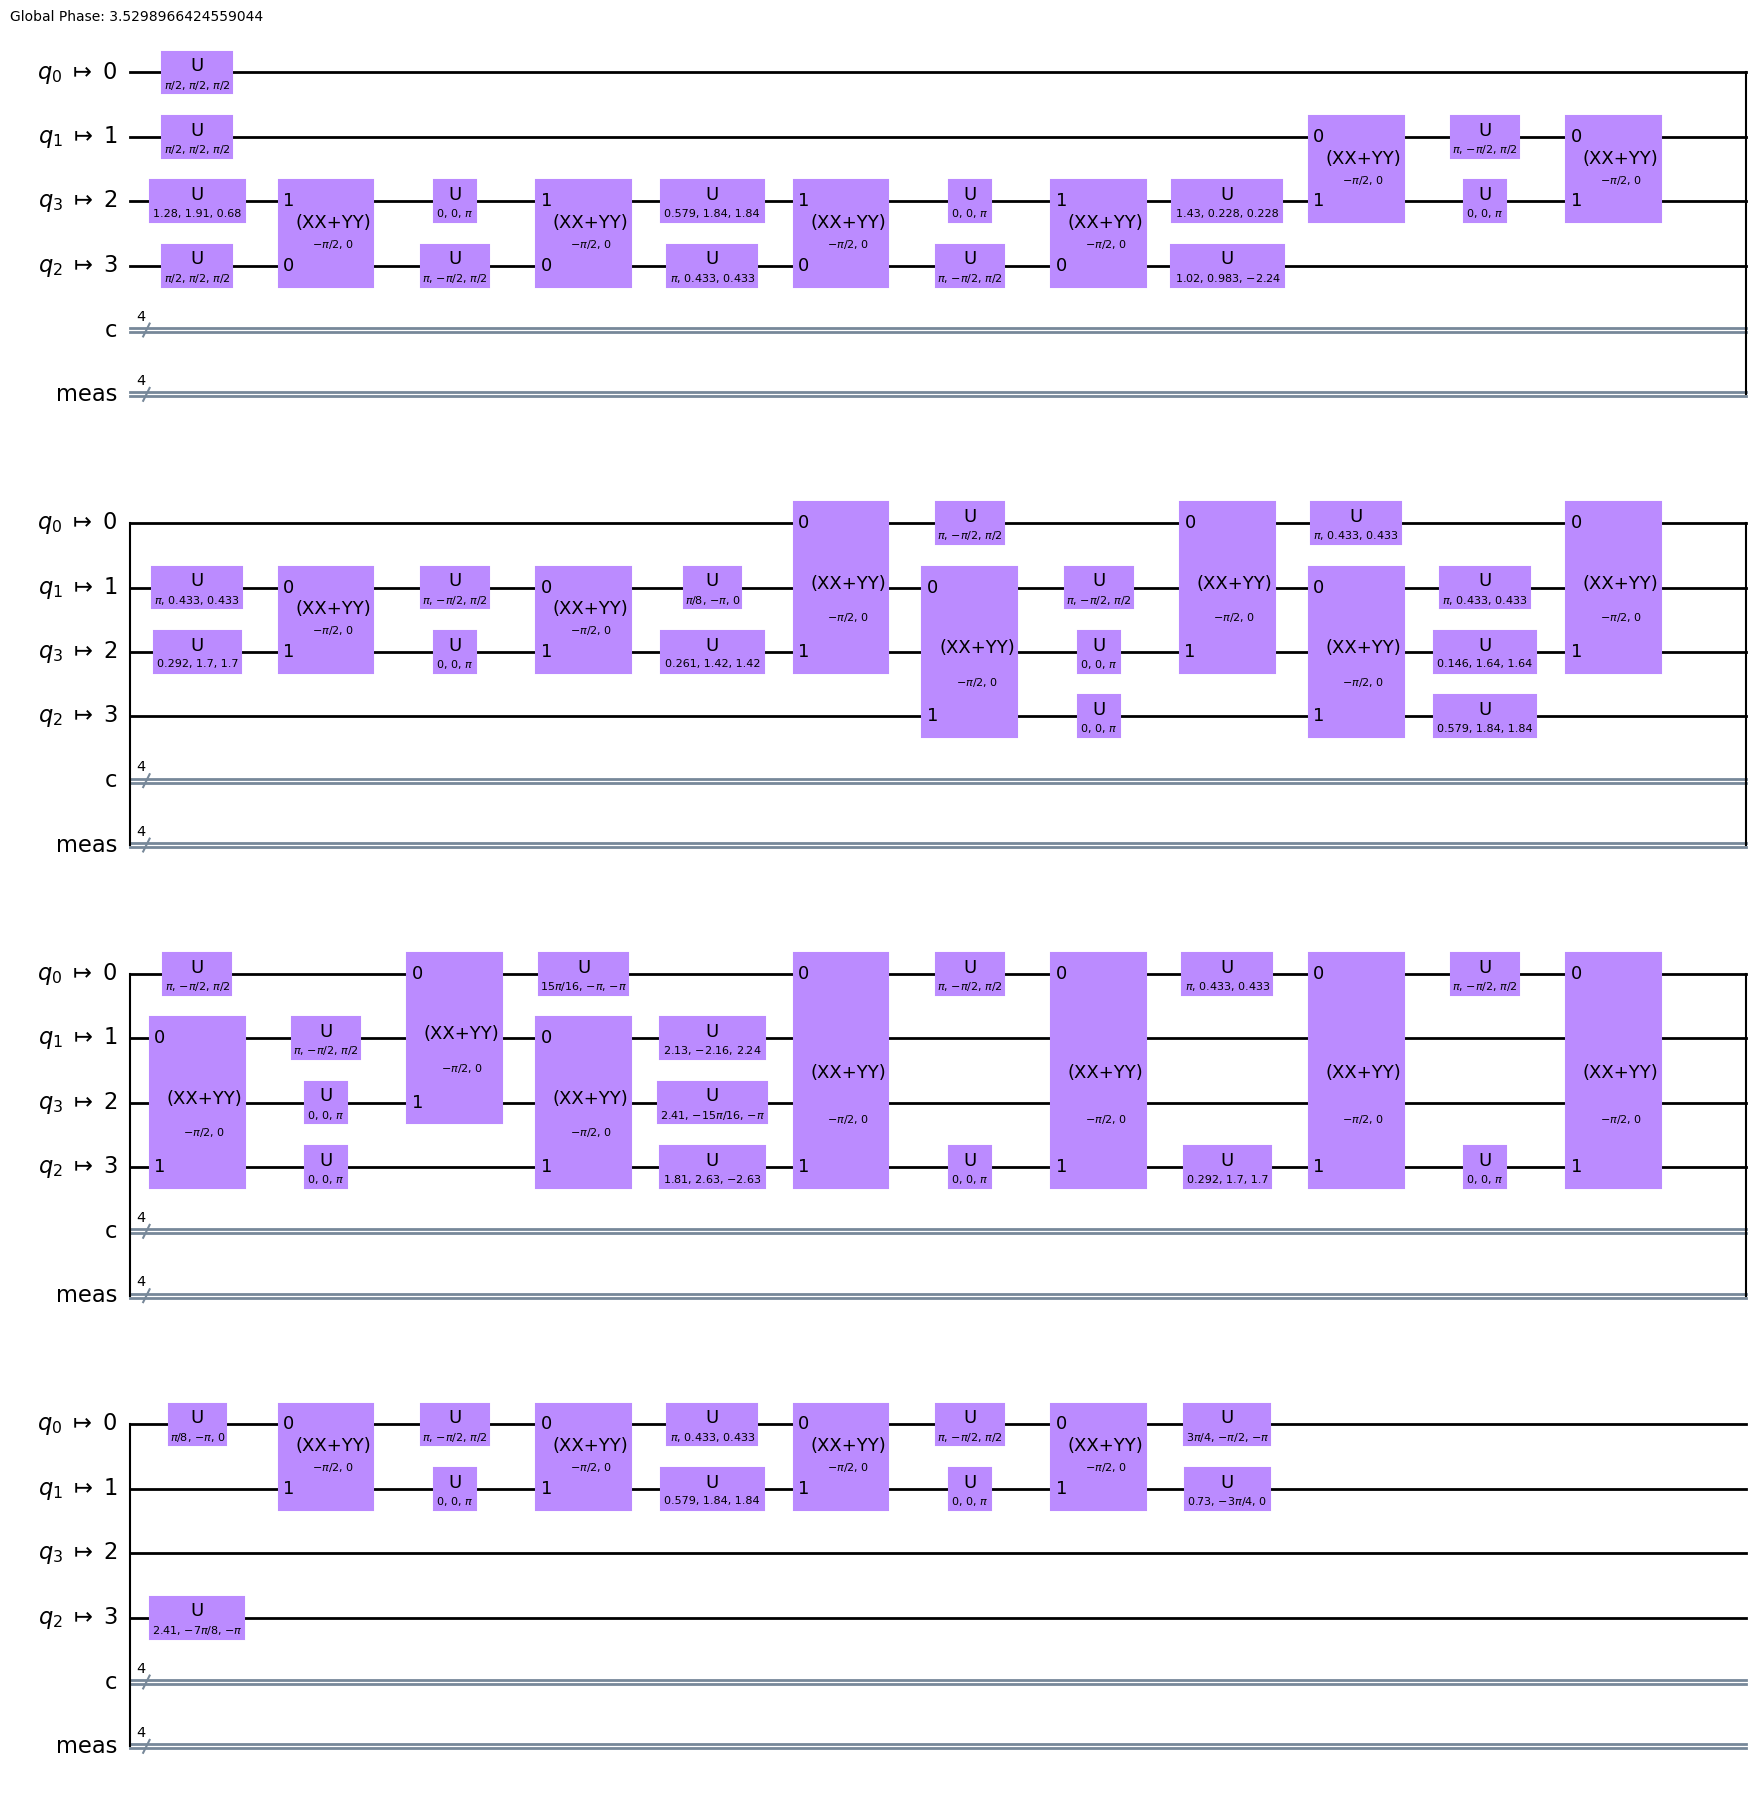

In [9]:
mirage_qc.draw("mpl")